In [109]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [110]:
weather = pd.read_csv('04_weekly_weather.csv')
# Convert our report_date columns to datetime datatype
weather['date'] = pd.to_datetime(weather['date'], format="%Y-%m-%d")

# create new year and month column from datetime
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month

In [111]:
zika = pd.read_csv('zikavirus.csv')

# filter out those rows which does not contain any data
zika = zika.dropna(how = 'all')
  
# Filter all rows for which the report_date is equal to 18437
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)

# covert string to an float
zika['cases'] = zika['cases'].astype(float)

# Replace nan value with 0,
zika['cases'] = zika['cases'].fillna(0)

# covert float to an int
zika['cases'] = zika['cases'].astype(int)

# Convert our report_date columns to datetime datatype
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")

# create new year and month column from datetime
zika['year'] = pd.DatetimeIndex(zika['report_date']).year
zika['month'] = pd.DatetimeIndex(zika['report_date']).month

# 1 Panama

In [112]:
pan_zika = zika[zika["location"].str.startswith("Panama")]
pan_zika.head()

,report_date,location,location_type,data_field,cases,year,month
226878,2016-01-06,Panama-Kuna_Yala-Mulatupu,county,Zika_confirmed_laboratory_2016,2,2016.0,1.0
226879,2016-01-06,Panama-Kuna_Yala-Ustupu,county,Zika_confirmed_laboratory_2016,14,2016.0,1.0
226880,2016-01-06,Panama-Kuna_Yala-Ogobsucum,county,Zika_confirmed_laboratory_2016,7,2016.0,1.0
226881,2016-01-06,Panama-Kuna_Yala-Achutupu,county,Zika_confirmed_laboratory_2016,7,2016.0,1.0
226882,2016-01-06,Panama-Kuna_Yala-Playon_Chico,county,Zika_confirmed_laboratory_2016,2,2016.0,1.0


In [113]:
pan_zika.shape

(6381, 7)

### 1.1 Data fields

In [114]:
pan_zika.data_field.unique()

array(['Zika_confirmed_laboratory_2016', 'Zika_confirmed_F',
       'Zika_confirmed_M', 'confirmed_age_under_1', 'confirmed_age_1-4',
       'confirmed_age_5-9', 'confirmed_age_10-14', 'confirmed_age_15-19',
       'confirmed_age_20-24', 'confirmed_age_25-34',
       'confirmed_age_35-49', 'confirmed_age_50-59',
       'confirmed_age_60-64', 'confirmed_age_65_plus',
       'Zika_confirmed_laboratory_2015', 'confirmed_age_under_5',
       'confirmed_age_10-19', 'confirmed_age_20-29',
       'confirmed_age_30-39', 'confirmed_age_40-49',
       'confirmed_age_60_plus', 'weekly_Zika_confirmed_asymptomatic',
       'weekly_Zika_confirmed_pending', 'weekly_Zika_confirmed_local',
       'weekly_Zika_confirmed_imported',
       'Zika_positive_pregnant_2015_2016',
       'Zika_negative_pregnant_2015_2016',
       'Zika_confirmed_laboratory_2017',
       'Zika_positive_pregnant_2015_2017',
       'Zika_negative_pregnant_2015_2017'], dtype=object)

In [115]:
pan_zika.location_type.unique()

array(['county', 'country', 'district', 'province'], dtype=object)

In [116]:
panamaCases = pan_zika.loc[(pan_zika['data_field'] == 'weekly_Zika_confirmed_local') & (pan_zika['location_type'] == 'country')]
panamaCases = panamaCases.sort_values(by=['report_date'])
panamaCases

,report_date,location,location_type,data_field,cases,year,month
230543,2016-02-19,Panama,country,weekly_Zika_confirmed_local,33,2016.0,2.0
231185,2016-03-01,Panama,country,weekly_Zika_confirmed_local,50,2016.0,3.0
231890,2016-03-07,Panama,country,weekly_Zika_confirmed_local,58,2016.0,3.0
232598,2016-03-17,Panama,country,weekly_Zika_confirmed_local,70,2016.0,3.0
233187,2016-03-21,Panama,country,weekly_Zika_confirmed_local,84,2016.0,3.0
233321,2016-03-28,Panama,country,weekly_Zika_confirmed_local,92,2016.0,3.0
227049,2016-04-04,Panama,country,weekly_Zika_confirmed_local,110,2016.0,4.0
227187,2016-04-11,Panama,country,weekly_Zika_confirmed_local,120,2016.0,4.0
227344,2016-04-18,Panama,country,weekly_Zika_confirmed_local,140,2016.0,4.0
227524,2016-05-10,Panama,country,weekly_Zika_confirmed_local,145,2016.0,5.0


### 1.2 Country wise cases

In [117]:
# Countries with zero case
total_cases = panamaCases.groupby(['location']).cases.agg([sum])
total_cases.sort_values('sum', ascending=False).head()

,sum
location,
Panama,2527


In [118]:
# remove countries with zero case
cases = total_cases[total_cases['sum'] == 0]
cases.index

Index([], dtype='object', name='location')

### 1.3 Analyse the pattern of spreading virus  in Panama

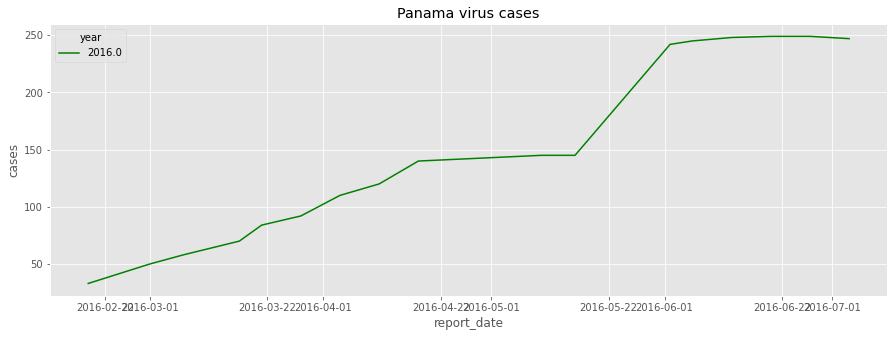

In [119]:
plt.figure(figsize=(15,5))
sns.lineplot(x='report_date', y='cases', hue='year',data=panamaCases,palette=['green'])
plt.title('Panama virus cases')
plt.show()

### 1.4 Analyse the pattern of spreading virus in Colombia

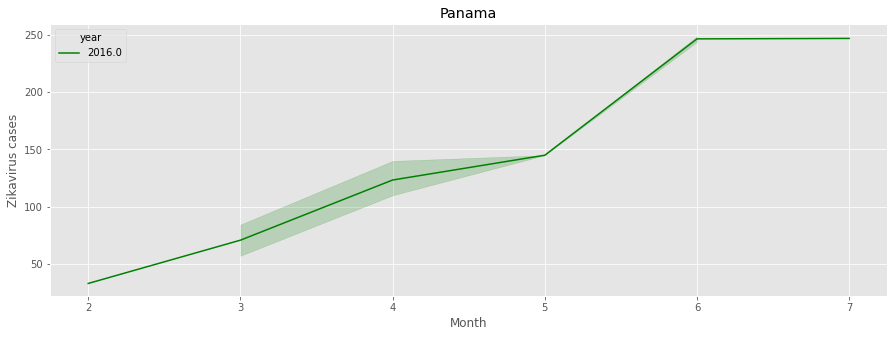

In [120]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='cases', hue='year',data=panamaCases, palette=['green'] )
plt.title('Panama')
plt.xlabel('Month')
plt.ylabel('Zikavirus cases')
plt.show()

Let's analyse the confirmed cases of zika virus with three environmental factors such as max temperature, precipitation and humidity. And also considering the incubation period 3–14 days.

### 1.5 Analysis the weather of Panama

In [121]:
panama = panamaCases.groupby(['report_date']).cases.agg([sum])
panama = panama.reset_index()

In [122]:
panama

,report_date,sum
0,2016-02-19,33
1,2016-03-01,50
2,2016-03-07,58
3,2016-03-17,70
4,2016-03-21,84
5,2016-03-28,92
6,2016-04-04,110
7,2016-04-11,120
8,2016-04-18,140
9,2016-05-10,145


### 1.7 Panama Weather

In [123]:
PanamaWeather = pd.read_csv('weatherdataset.csv')
PanamaWeather = PanamaWeather[PanamaWeather["location"].str.startswith("Panama")]
PanamaWeather.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
5590,2017-12-23,31,24,0.0,11.6,6,31,10:29 AM,10:35 PM,06:29 AM,06:05 PM,23,30,30,26,17,38,82,0.5,1010,31,10,185,12,Panama
5591,2017-12-24,30,24,0.0,11.6,6,39,11:12 AM,11:23 PM,06:30 AM,06:06 PM,23,29,29,26,18,29,83,3.8,1011,30,10,187,12,Panama
5592,2017-12-25,28,24,0.0,11.6,6,46,11:55 AM,No moonset,06:30 AM,06:06 PM,23,29,29,26,17,41,87,7.1,1012,28,10,136,11,Panama
5593,2017-12-26,29,24,0.0,11.6,6,53,12:38 PM,12:11 AM,06:31 AM,06:07 PM,22,28,28,26,22,26,81,1.2,1012,29,10,60,14,Panama
5594,2017-12-27,28,24,0.0,11.6,6,61,01:23 PM,01:02 AM,06:31 AM,06:08 PM,22,28,28,25,18,38,83,2.3,1012,28,10,182,12,Panama


In [124]:
# Convert our report_date columns to datetime datatype
PanamaWeather['date_time'] = pd.to_datetime(PanamaWeather['date_time'], format="%Y-%m-%d")

# create new year and month column from datetime
PanamaWeather['year'] = pd.DatetimeIndex(PanamaWeather['date_time']).year
PanamaWeather['month'] = pd.DatetimeIndex(PanamaWeather['date_time']).month

### Case 1
* Report date - 2016-02-19 = 33
* weather date - 2016-02-05 to 	2016-02-19

Text(0.5, 1.0, 'Humidity')

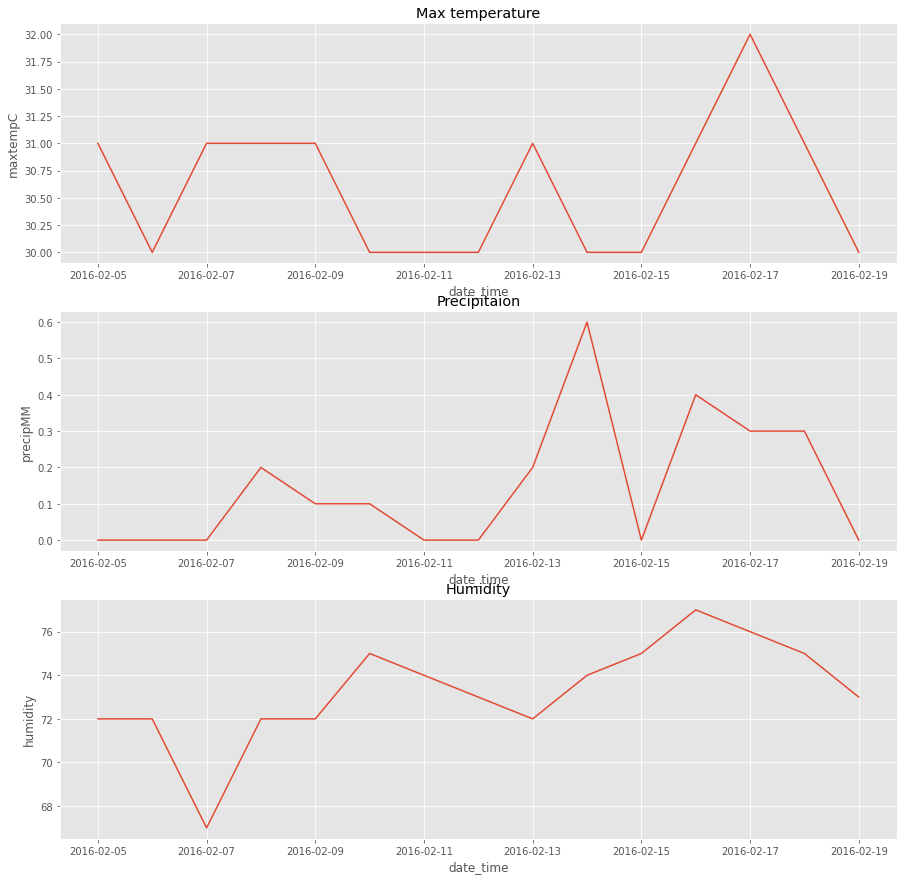

In [125]:
panama_case1 = PanamaWeather.loc[(PanamaWeather['date_time'] >= '2016-02-05') & (PanamaWeather['date_time'] <= '2016-02-19')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=panama_case1)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=panama_case1)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=panama_case1)
axes[2].set_title('Humidity')

### Case 2
* Report date - 2016-06-20 = 249
* weather date - 2016-06-06  to 2016-06-20

Text(0.5, 1.0, 'Humidity')

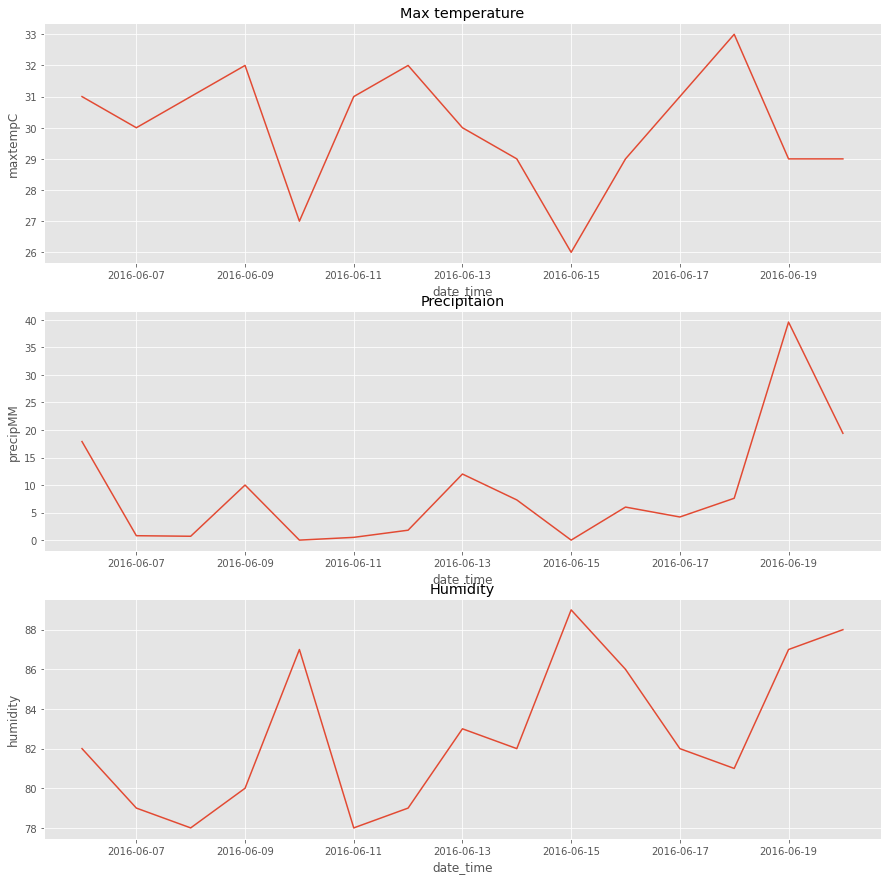

In [126]:
panama_case2 = PanamaWeather.loc[(PanamaWeather['date_time'] >= '2016-06-06') & (PanamaWeather['date_time'] <= '2016-06-20')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=panama_case2)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=panama_case2)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=panama_case2)
axes[2].set_title('Humidity')

### Case 3
* Report date - 2016-06-02 =	242
* weather date - 2016-05-19  to 2016-06-02

Text(0.5, 1.0, 'Humidity')

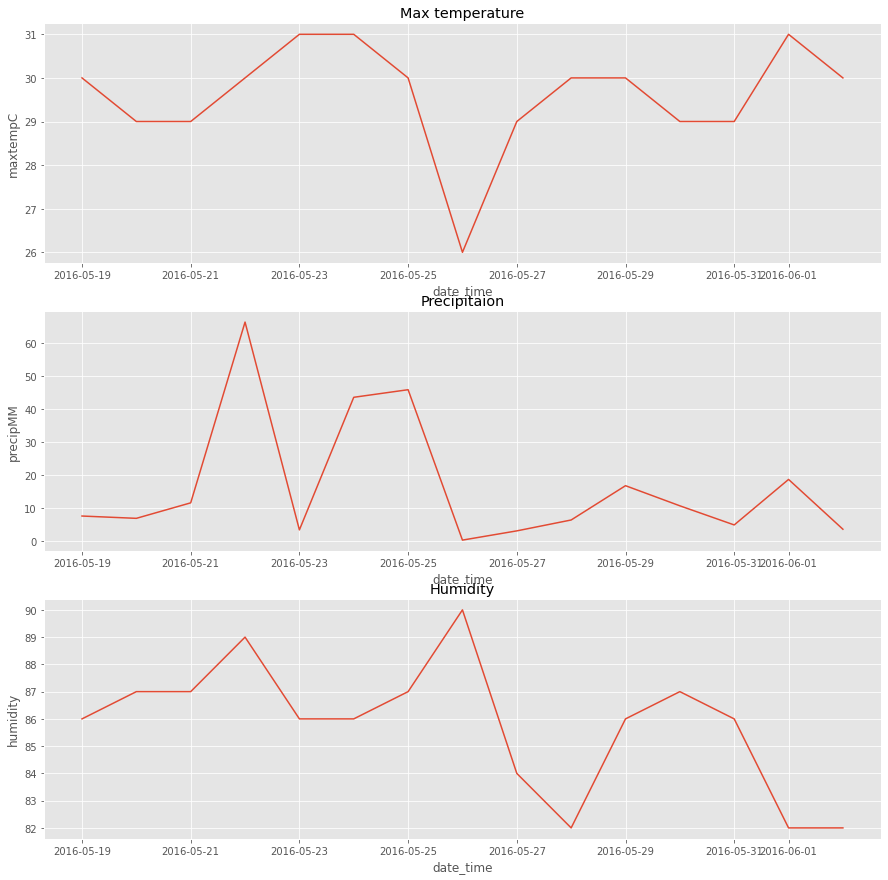

In [134]:
panama_case3 = PanamaWeather.loc[(PanamaWeather['date_time'] >= '2016-05-19') & (PanamaWeather['date_time'] <= '2016-06-02')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=panama_case3)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=panama_case3)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=panama_case3)
axes[2].set_title('Humidity')

Text(0.5, 1.0, 'Humidity')

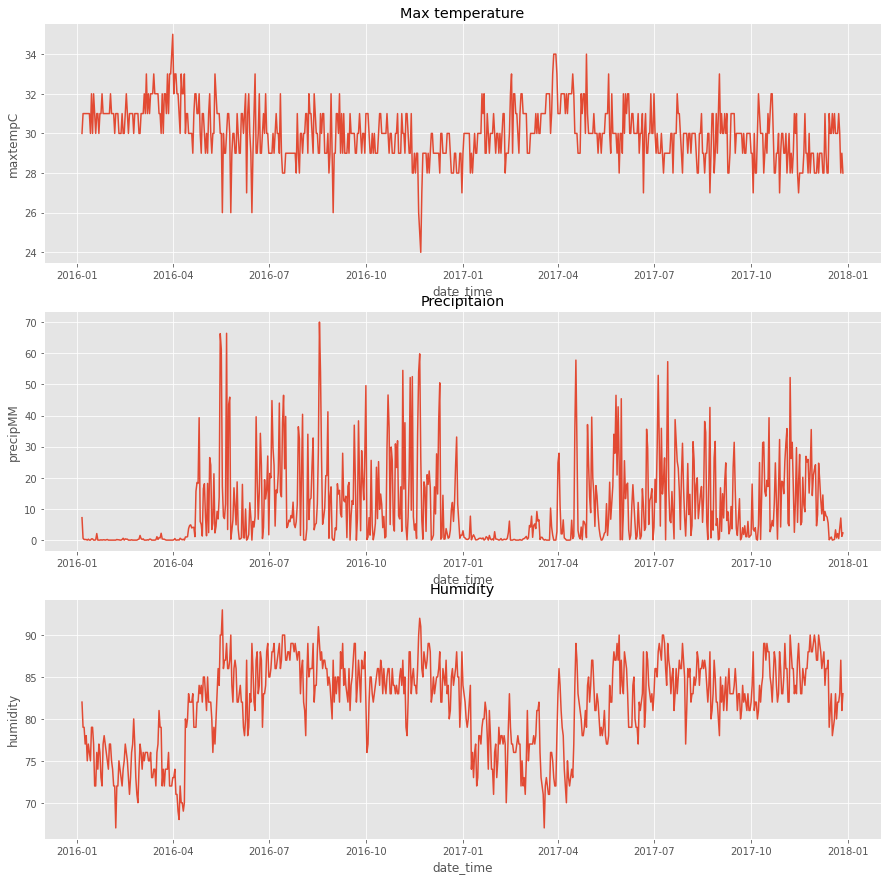

In [129]:
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=PanamaWeather)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=PanamaWeather)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=PanamaWeather)
axes[2].set_title('Humidity')

In [130]:
panama_cases = panama.rename(columns={"report_date": "date_time"})
PanamaWeather = PanamaWeather[['date_time','maxtempC','precipMM','humidity']]
panama_case = pd.merge(panama_cases,PanamaWeather, on=['date_time'], how='left') 
panama_case.head()

,date_time,sum,maxtempC,precipMM,humidity
0,2016-02-19,33,30,0.0,73
1,2016-03-01,50,30,1.5,77
2,2016-03-07,58,33,0.0,76
3,2016-03-17,70,32,1.1,76
4,2016-03-21,84,30,2.2,79


Text(0.5, 1.0, 'Humidity')

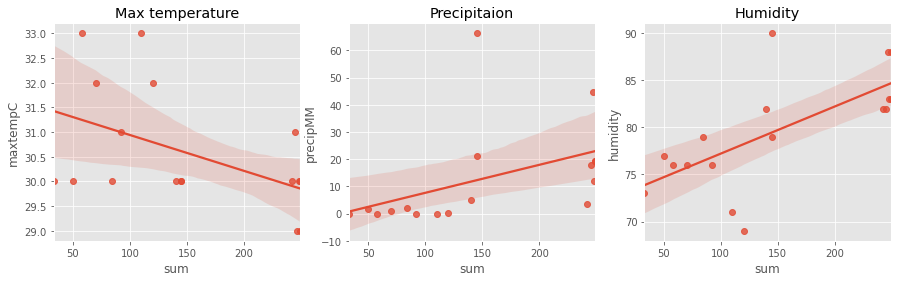

In [132]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.regplot(ax=axes[0],y=panama_case['maxtempC'], x=panama_case['sum'])
axes[0].set_title('Max temperature')
sns.regplot(ax=axes[1],y=panama_case['precipMM'], x=panama_case['sum'])
axes[1].set_title('Precipitaion')
sns.regplot(ax=axes[2],y=panama_case['humidity'], x=panama_case['sum'])
axes[2].set_title('Humidity')

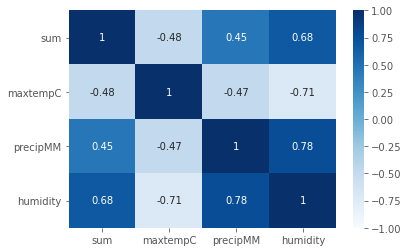

In [133]:
sns.heatmap(panama_case.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1) 